# Project: Investigate a Dataset (TMDb_Movies Dataset_)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>**My logical Intuition behind this dataset, analyze, Investigating the observation, visualizing the graph plot on the TMDb_movie dataset.**
>About the TMDb_movie dataset it contains more than 10,000 movies records with the features rating, revenue, cast, popularity like that.
\
>In this report, I explore the following questions:
Q1.Which movies has highest and lowest popularity based on popularity feature_.\
Q2.The genres popularity from the top to bottom based on the entire record.\
Q3.Did movies with higher vote count received a better rating in the dataset?\
Q4.Now find the Top 5 Directors with most number of movies with made the most profit?\
Q5.So now taking average profit per year and total profilt over the years?\
Q6.creating one more column for rating scale and checking about the rating scale?

##Importing some essential dependencies/libraries

In [0]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

>Now i will load the data, check for cleanliness, and then trim and clean dataset for analysis.

### General Properties

In [28]:
df_tmdb = pd.read_csv('/content/tmdb-movies.csv')
df_tmdb.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [29]:
df_tmdb.shape

(10866, 21)

In [30]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [31]:
#Now we finding the missing value present in the dataset
#as we can see the missing values for each columns
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [32]:
sum(df_tmdb.duplicated())

1

> Only one dublicate we have :)

In [33]:
df_tmdb[df_tmdb.duplicated(keep = False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> This is duplicated record available in the TMBD dataset_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f779bd9b2b0>,
      dtype=object)

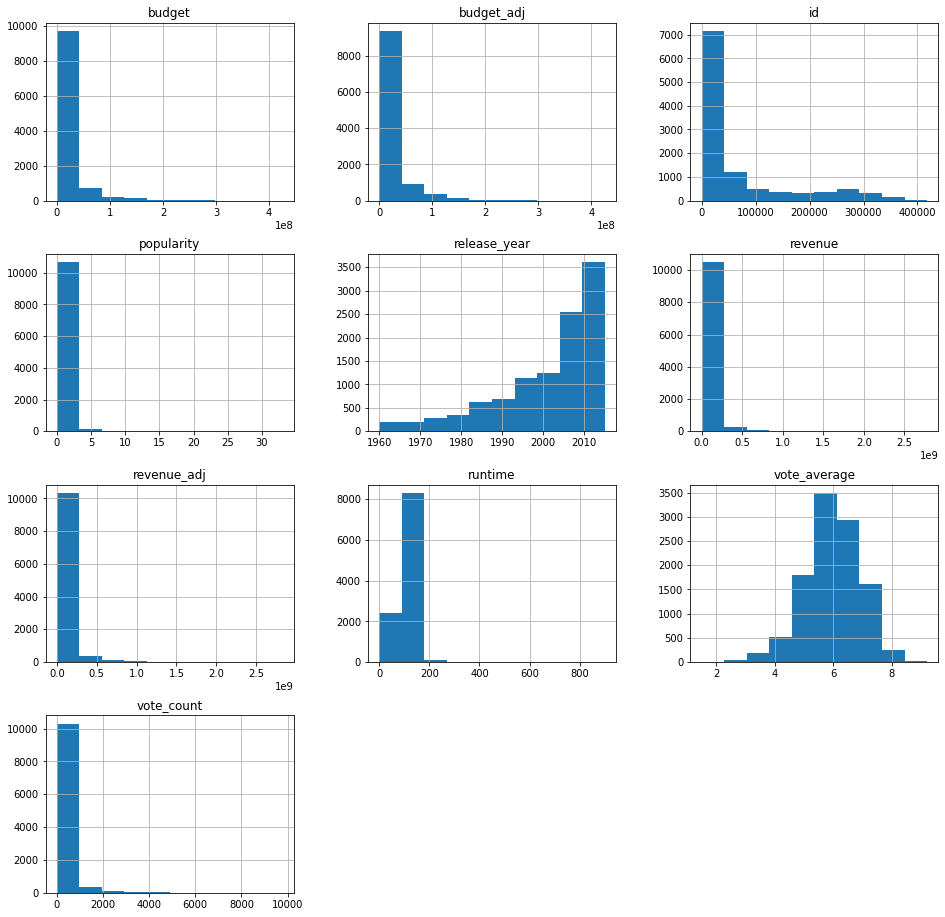

In [34]:
df_tmdb.hist(figsize = (16, 16))

**Obeservations :**\
1.Above graph show there are some graph are positive skewed and some are negatively skewed.\
2.also some columns are not important to analysis so we removing them while cleaning the data.
3.Data is not complicated means it realtively clean.


##Data Cleaning
>1. we will clean the our tmdb dataset. fist step is drop all duplicate record, then we will deleting the unnessesary columns like
budget, 
cast, 
homepage, 
director, 
tagline, 
keywords, 
overview, 
production_companies.
> 2. Also dropping the zero value or filling the NAN value.


In [35]:
#deleting the duplicates
df_tmdb.drop_duplicates(keep = False, inplace = True)
print('Duplicated values :',sum(df_tmdb.duplicated()))
print('Checking the shape :', df_tmdb.shape)

Duplicated values : 0
Checking the shape : (10864, 21)


In [36]:
#also changing the type of the 'release date to datatime
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [37]:
#now we going to droop the unnessary columns
df_tmdb.drop(['id','imdb_id','homepage','tagline','keywords','overview','budget','revenue','runtime', 'production_companies'],axis=1,inplace=True)
df_tmdb.head(3)

,popularity,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [0]:
#replacing all the zeros with the NAN value
df_tmdb = df_tmdb.replace(to_replace=0, value=np.nan)

In [0]:
#dropping all the rows with null values
df_tmdb.dropna(how='any', axis=0, inplace=True)

In [40]:
#checking for null value
df_tmdb.isnull().sum().any()

False

In [41]:
#right now we don't have any  missing value
df_tmdb.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3.848000e+03
mean,1.193088,528.495842,6.168997,2001.255977,4.429732e+07,1.372667e+08
std,1.475783,880.422193,0.794577,11.286229,4.481883e+07,2.162187e+08
min,0.001117,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463291,71.000000,5.700000,1995.000000,1.315864e+07,1.843827e+07
50%,0.799015,205.000000,6.200000,2004.000000,3.007926e+07,6.182197e+07
75%,1.374400,581.250000,6.700000,2010.000000,6.076720e+07,1.635528e+08
max,32.985763,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [42]:
df_tmdb.head(3)

,popularity,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [43]:
#adding new columns in DF which is profit cal the revenue and budget
df_tmdb['profit'] = df_tmdb['revenue_adj'] - df_tmdb['budget_adj']
df_tmdb.head(1)

,popularity,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [0]:
 df_tmdb.to_csv('clean_tmdb_df.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which movies has highest and lowest popularity based on popularity feature_)

In [45]:
final_df = pd.read_csv('/content/clean_tmdb_df.csv')
final_df.head()

,popularity,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [46]:
lowest_value = final_df['popularity'].idxmin()
highest_value = final_df['popularity'].idxmax()
print('highest value in popularity',final_df['original_title'][highest_value])
print('lowest value in popularity',final_df['original_title'][lowest_value])


highest value in popularity Jurassic World
lowest value in popularity Born into Brothels


In [47]:
high = pd.DataFrame(final_df.loc[highest_value,:])
low = pd.DataFrame(final_df.loc[lowest_value,:])
pd.concat([high,low],axis = 1)

,0,2552
popularity,32.9858,0.001117
original_title,Jurassic World,Born into Brothels
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni
director,Colin Trevorrow,Zana Briski|Ross Kauffman
genres,Action|Adventure|Science Fiction|Thriller,Documentary
release_date,2015-06-09,2004-12-08
vote_count,5562,23
vote_average,6.5,6.4
release_year,2015,2004
budget_adj,1.38e+08,404056


> As we can see the highest value in the dataet or record is jurassic world and the lowest value is the Born into Brothels.

**Q2: The genres popularity from the top to bottom based on the entire record**

<Figure size 1080x720 with 0 Axes>

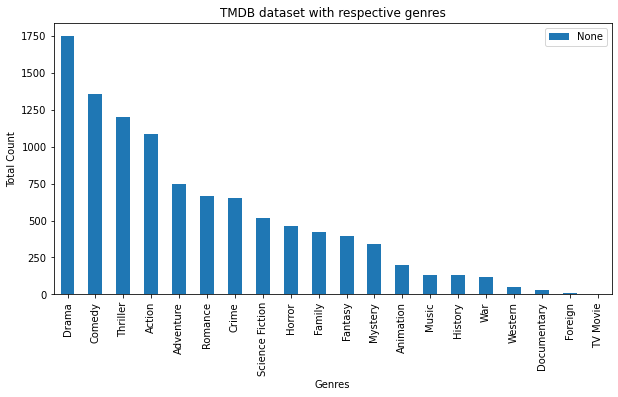

<Figure size 1080x720 with 0 Axes>

In [48]:
def popularity(x):
    genres_data = final_df[x].str.cat(sep = '|')
    # Spliting the genres into a Pandas Series
    data_ = pd.Series(genres_data.split('|'))
    count_ = data_.value_counts(ascending = False)
    return count_

#plotting the graph
genre_count = popularity('genres') # genres column as one long string
ax = genre_count.plot.bar(figsize=(10,5), title='TMDB dataset with respective genres')
ax.legend()
ax.set_xlabel("Genres") #xlabel
ax.set_ylabel("Total Count") #ylabels
plt.figure(figsize=(15,10))

**Observations :**
>The record are positively skewed most lovable section is drama, comedy, thriller and action movie people liked.

**Q3. Did movies with higher vote count received a better rating in the dataset?**

In [0]:
#Slicing the DataFrame to get 2 columns 'vote_average' and 'vote_count'
df_vote_count = final_df.loc[:, 'vote_count' : 'vote_average']
df_vote_count_2000 = df_vote_count[df_vote_count['vote_count'] > 2000] #considered with more than 2000 votes

AxesSubplot(0.125,0.125;0.775x0.755)
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
              vote_count  vote_average
vote_count      1.000000      0.387201
vote_average    0.387201      1.000000
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
AxesSubplot(0.125,0.125;0.775x0.755)
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
              vote_count  vote_average
vote_count      1.000000      0.291649
vote_average    0.291649      1.000000


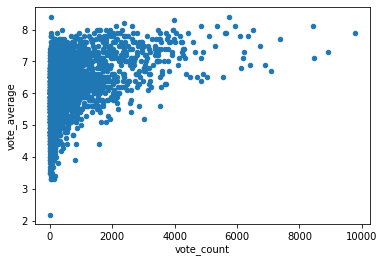

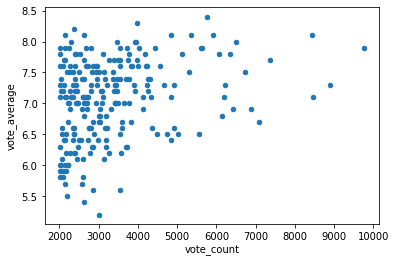

In [50]:
print(df_vote_count.plot(x='vote_count', y='vote_average', kind='scatter'))
print('* '*50)
print(df_vote_count.corr())
print('* '*50)
print(df_vote_count_2000.plot(x='vote_count', y='vote_average', kind='scatter'))
print('* '*50)
print(df_vote_count_2000.corr())

**Observations :**
>1.In first graph vote_average seems to have the strongest correlation with vote_count , so it would probably do the best job predicting the value with resp to datasets.
2. The second graph show there is less correlation bet the both. because of less record.

**Q4. Now find the Top 5 Directors with most number of movies with made the most profit**

In [51]:
#list the diretors 
list_of_directors = final_df['director'].value_counts()
list_of_directors[list_of_directors > 20].head(5)

Steven Spielberg    27
Clint Eastwood      24
Ridley Scott        21
Name: director, dtype: int64

In [52]:
#top five director with most number of movies
top_directors = final_df.groupby('director')['profit'].sum().sort_values(ascending=False)[:5]
top_directors

director
Steven Spielberg    1.312603e+10
James Cameron       6.296578e+09
George Lucas        5.844159e+09
Peter Jackson       5.645492e+09
Robert Zemeckis     4.335995e+09
Name: profit, dtype: float64

Text(0.5, 1.0, 'Top 5 Director with Profit')

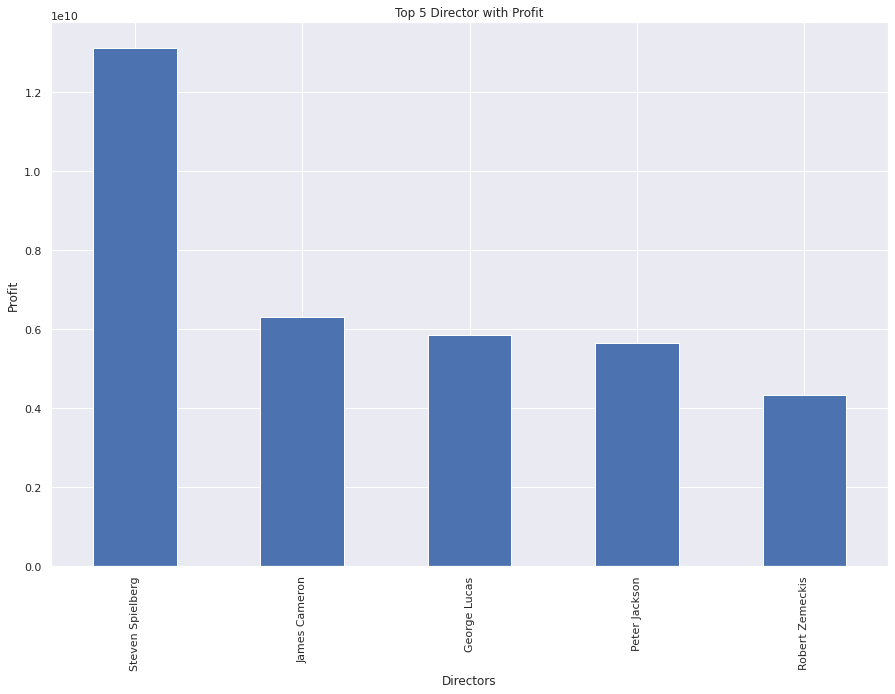

In [53]:
sns.set()
top_directors.plot(kind='bar',figsize=(15,10))
plt.xlabel('Directors')
plt.ylabel('Profit')
plt.title('Top 5 Director with Profit')

**Obervations :**
> 1.the record show top 5 directors with their profits in decending order.

**Q5: So now taking average profit per year and total profilt over the years**

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 


Text(0, 0.5, 'total profit')

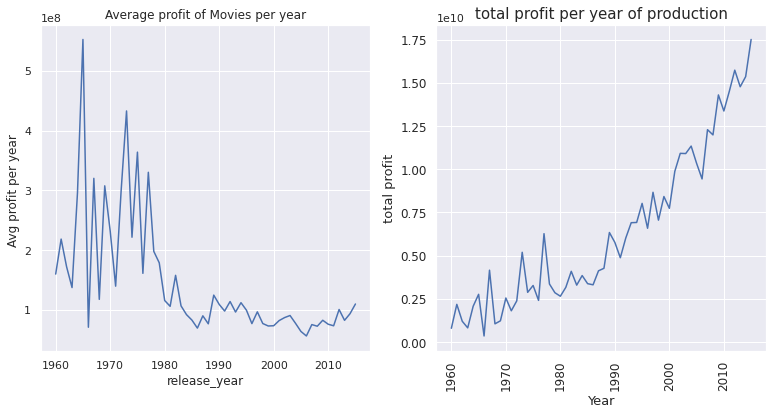

In [54]:

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)


plt.xlabel('Years')
plt.ylabel('Avg profit per year ')
plt.title('Average profit of Movies per year')
final_df.groupby('release_year')['profit'].mean().plot() #plotting the graph using the mean
print('* '*50)
plt.subplot(1,2,2)
year_profit = final_df.groupby('release_year')['profit'].sum()
year_profit.plot(kind='line', figsize=(13,6),fontsize=12)
plt.title("total profit per year of production",fontsize=15)
plt.xticks(rotation = 90)
plt.xlabel('Year',fontsize=13)
plt.ylabel("total profit",fontsize= 13)


**Obervations : **
>1. So in first plot as we can see the highest profit locates in between 1960 to 1985.
2. from 1985 the profit graph goes down.
3.In the second graph we can see the total_profit difference is 0.25 and graph shows from 1960 the graph constantly increases.

**Q6. creating one more column for rating scale and checking about the rating scale**

In [55]:
final_df.head()

,popularity,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [56]:
#rename the vote_average to imdb_score
final_df = final_df.rename(columns = {'vote_average' : 'imdb_score'})
final_df.head(1)

,popularity,original_title,cast,director,genres,release_date,vote_count,imdb_score,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [57]:
edges = ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
names = (['humorous','terrible', 'not so good', 'nahhh', 'Average', 'Good', 'Very Good', 'Excellent', 'Awesome'])
final_df['rating_scale'] = pd.cut(final_df['imdb_score'], bins = edges, labels = names, include_lowest=True)
final_df.head(3)

,popularity,original_title,cast,director,genres,release_date,vote_count,imdb_score,release_year,budget_adj,revenue_adj,profit,rating_scale
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Good
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Very Good
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Good


In [58]:
final_df['imdb_score'].describe()

count    3848.000000
mean        6.168997
std         0.794577
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: imdb_score, dtype: float64

**Observations :**
> 1.ok the table show the most of the imdb_rating is in between 6 to 8.\
2.Also 25% of movies have very low rating and 50% having average.

<a id='conclusions :'></a>
## Conclusions

>1.Finally completed all the obervation with respective features in that we first taking dataset applying data cleaning then applying the exploratory data analysis also applying some statastical approchs.

2.also finding which movie has highest value in popularity is Jurassic World
lowest value in popularity Born into Brothels.

3.Then analysed the most movie have high revenue/profit.
 
4.The find out the top record 5 directors with their profits in decending order.

5.Average profit per year spike between 1960, and 1985, then it flaten. Total profit on the other hand keeps increasing over the time. this is happened due to increase number of movies everyday.


**Limitations:**
>1. In the TMDB dataset i found some limitation like lots of missing value, lots of zeros in the dataset it may affect of accuracy.
2.also for the analysis I have only considered directors, popularity, genre and revenue, profit. I have not considered the impact of production companies or budget on the revenue in the analysis.

**References : **
>1. Github
2. Stackoverflow
3. kaggle notebooks